In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import numpy as np
from flask import Flask, jsonify

df = pd.read_csv('kidney_disease.csv')


In [11]:
# Separate into numerical and categorical variables
numerical_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(exclude=[np.number])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [15]:
numerical_features = numerical_features.fillna(numerical_features.median())

In [16]:
numerical_features.isna().sum()

id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
dtype: int64

In [17]:
categorical_features.isna().sum()

rbc               152
pc                 65
pcc                 4
ba                  4
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [18]:
for column in categorical_features.columns:
    categorical_features[column].fillna(categorical_features[column].mode()[0], inplace=True)

In [19]:
categorical_features.isna().sum()

rbc               0
pc                0
pcc               0
ba                0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [20]:
df_joined = pd.concat([numerical_features, categorical_features], axis=1)

In [21]:
df_joined.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [22]:
from sklearn.preprocessing import LabelEncoder

# Selecting only the categorical columns from the joined DataFrame
categorical_cols = categorical_features.columns

# Creating a copy of the DataFrame to encode
df_encoded = df_joined.copy()

# Initializing the LabelEncoder
le = LabelEncoder()

# Encoding each categorical column in the DataFrame
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,...,26,56,34,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,...,19,70,34,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,...,23,68,27,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,...,35,62,30,0,3,1,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,42,72,44,0,3,1,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,...,37,61,36,0,3,1,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,39,67,41,0,3,1,0,0,0,2


In [23]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Applying StandardScaler to the encoded DataFrame
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Removing outliers: keeping only the rows that have z-scores less than |3| in all columns
z_scores = stats.zscore(df_scaled)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = df_scaled[filtered_entries]

df_no_outliers

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,-1.727726,-0.210031,0.254214,0.421486,0.076249,-0.380269,-0.320122,-0.419451,-0.319668,0.040104,...,0.575394,0.293204,0.424844,1.311903,1.209416,-0.276686,-0.507801,-0.484322,-0.420084,-0.780813
1,-1.719066,-2.627234,-1.972476,0.421486,2.363728,-0.380269,-0.320122,-0.784315,-0.390819,0.040104,...,-0.147993,-0.286322,0.424844,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084,-0.780813
3,-1.701745,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,-0.373337,-0.014047,0.142813,-2.896333,...,-0.871379,-0.069000,-1.153525,1.311903,-0.518321,-0.276686,1.969276,2.064742,2.380476,-0.780813
4,-1.693085,-0.033163,0.254214,-1.421074,0.838742,-0.380269,-0.519679,-0.622154,-0.284093,0.040104,...,-0.509686,0.148322,-0.311728,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084,-0.780813
5,-1.684425,0.497443,0.996444,-0.499794,1.601235,-0.380269,-0.945399,-0.642424,-0.337456,0.475132,...,-0.027428,0.293204,-0.522177,1.311903,1.209416,-0.276686,-0.507801,2.064742,-0.420084,-0.780813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.693085,0.202662,0.254214,0.421486,-0.686244,-0.380269,-0.067350,-0.155939,-0.444182,1.345187,...,0.937087,-0.069000,0.003946,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084,1.287566
396,1.701745,-0.563768,-0.488016,1.342766,-0.686244,-0.380269,-0.932096,-0.520803,-0.319668,0.366375,...,1.781038,0.293204,1.477091,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084,1.287566
397,1.710406,-2.332453,0.254214,0.421486,-0.686244,-0.380269,-0.599501,-0.622154,-0.426395,-0.068653,...,1.178216,-0.105220,0.635294,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084,1.287566
398,1.719066,-2.037673,-1.230246,1.342766,-0.686244,-0.380269,-0.413248,-0.135669,-0.355244,-0.286167,...,1.419345,0.112102,1.161417,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084,1.287566


In [27]:
df_encoded.to_csv("kidney_disease_dataset_with_cat.v1.csv", index=False)

In [26]:
df_no_outliers.to_csv("kidney_disease_dataset_with_cat.csv", index=False)

c:\Users\bindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


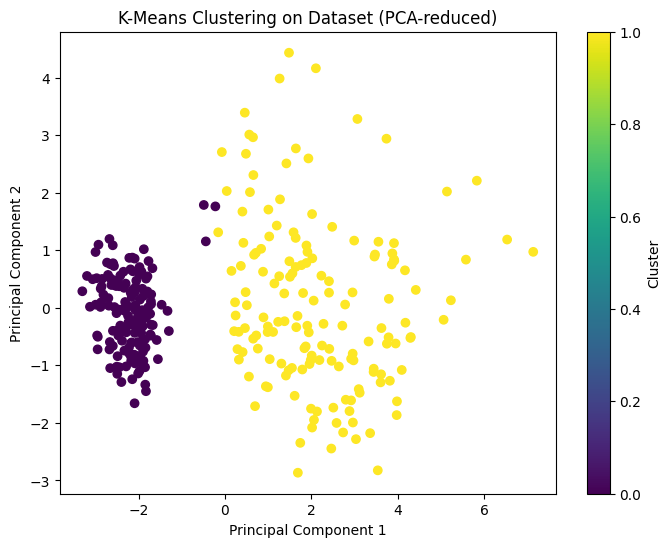

In [24]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Implementing K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_no_outliers)

# Adding the cluster labels to the dataset
df_clustered = df_no_outliers.copy()
df_clustered['Cluster'] = clusters

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_clustered.drop('Cluster', axis=1))
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df['Cluster'] = clusters

# Plotting the PCA-reduced data with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=principal_df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering on Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

c:\Users\bindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bindu\AppData\Local\Temp\ipykernel_22632\1521837900.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Cluster'] = clusters


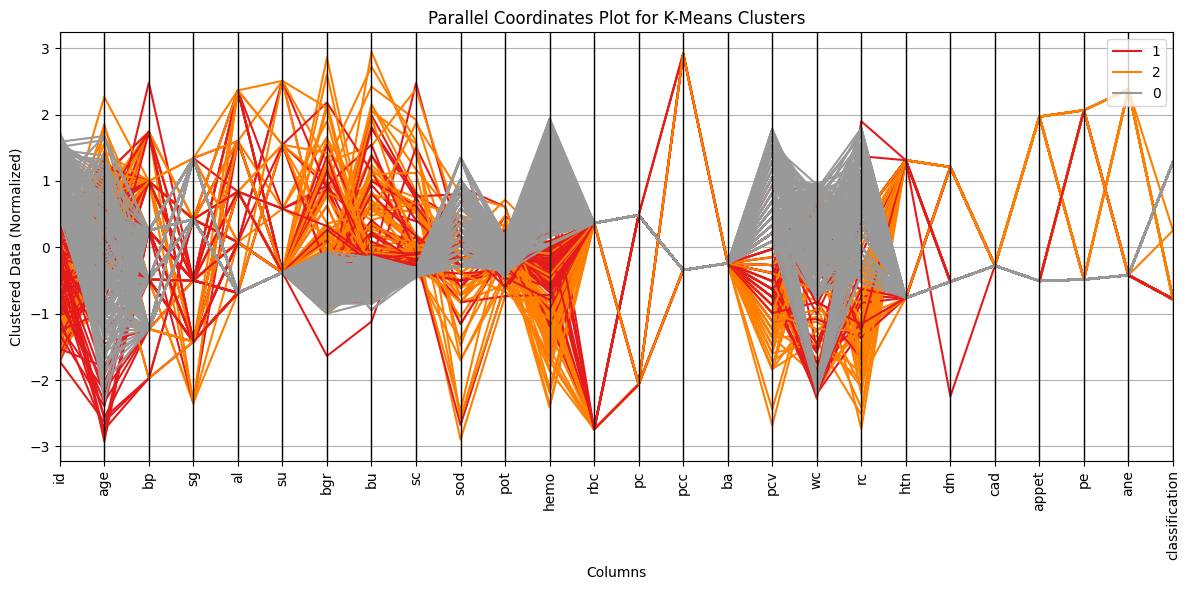

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Applying K-Means clustering with an arbitrary choice of 3 clusters (this can be adjusted)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_no_outliers)

# Adding the cluster labels to the DataFrame
df_no_outliers['Cluster'] = clusters

# Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(df_no_outliers, 'Cluster', colormap=plt.get_cmap("Set1"))
plt.xticks(rotation=90)
plt.title('Parallel Coordinates Plot for K-Means Clusters')
plt.xlabel('Columns')
plt.ylabel('Clustered Data (Normalized)')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()